In [21]:
#import all the necessary packages
import netCDF4 as nc4
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colors as c
from mpl_toolkits.basemap import Basemap, shiftgrid

In [11]:
#read the calipso data
path='aerocom.CALIOP_V3.00_Cloudfree_day.monthly.ec532aer.2010.nc' 
f = nc4.Dataset(path, "r")

In [17]:
lat=f.variables['latitude']
lon=f.variables['longitude']
ext=f.variables['ec532aer']
time=f.variables['time']

In [3]:
#reading the first month and averaging over all the levels
_ext_1=ext[10,:,:,:]
np.shape(ext_1)
ext_2=np.nanmean(_ext_1,axis=2)
xlon,xlat=np.meshgrid(lon,lat)
np.shape(ext_2)
np.shape(xlon)

(85, 72)

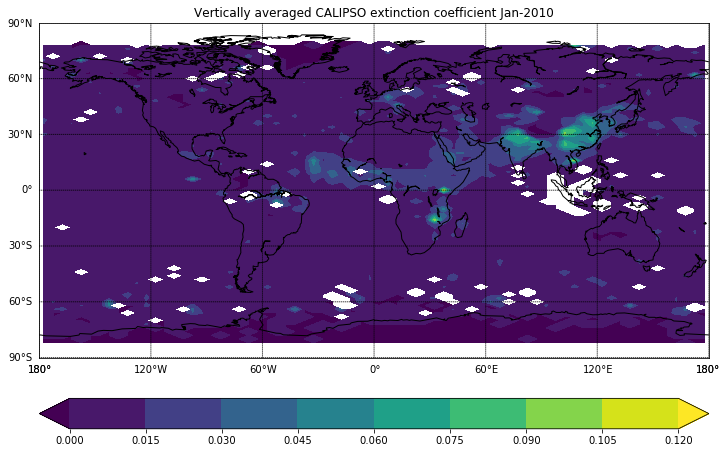

In [18]:
#plotting the vertically averaged extinction coefficient
fig=plt.figure(figsize=[12,15])
ax=fig.add_subplot(1,1,1)   # specify (nrows, ncols, axnum)
ax.set_title('Vertically averaged CALIPSO extinction coefficient Jan-2010')
map=Basemap(projection='cyl',llcrnrlat=-90,urcrnrlat=90,\
           llcrnrlon=-180,urcrnrlon=180,resolution='c',ax=ax)
map.drawcoastlines()
map.drawparallels(np.arange(-90.,120.,30.),labels=[1,0,0,0])
map.drawmeridians(np.arange(-180.,180.,60.),labels=[0,0,0,1])

cs=map.contourf(xlon,xlat,ext_2,extend='both')
#fig.colorbar(mappable=None, cax=None, ax=None, **kw)
cbar=plt.colorbar(cs,extend='both',orientation='horizontal',fraction=0.04,pad=0.05)

